<a href="https://colab.research.google.com/github/Dannyiel/My-Rock-Paper-Scissor-Code/blob/main/TBE_737.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! /usr/bin/env python3
#
def backward_euler ( f, tspan, y_zero, n ):

## backward_euler() uses backward Euler to solve an ODE.
#      t[0] = 0.0
#    should be
#      t[0] = tspan[0]

#  Input:
#
#    function f: evaluates the right hand side of the ODE.
#
#    real tspan[2]: the starting and ending times.
#
#    real y0[m]: the initial conditions.
#
#    integer n: the number of steps.
#
#  Output:
#
#    real t[n+1], y[n+1,m]: the solution estimates.

 from scipy.optimize import fsolve
import numpy as np

if ( np.ndim ( y_zero) == 0 ):
    m = 1
else:
    m = len ( y_zero )

t = np.zeros ( n + 1 )
y = np.zeros ( [ n + 1, m ] )

dt = ( tspan[1] - tspan[0] ) / float ( n )

t[0] = tspan[0];
y[0,:] = y_zero

for i in range ( 0, n ):

    to = t[i]
    yo = y[i,:]
    tp = t[i] + dt
    yp = yo + dt * f ( to, yo )

    yp = fsolve ( backward_euler_residual, yp, args = ( f, to, yo, tp ) )

    t[i+1]   = tp
    y[i+1,:] = yp[:]

return t,y

def backward_euler_residual ( yp, f, to, yo, tp ):

#*****************************************************************************80
#
## backward_euler_residual() evaluates the backward Euler residual.
#
#  Discussion:
#
#    We are seeking a value YP defined by the implicit equation:
#
#      YP = YO + ( TP - TO ) * F ( TP, YP )
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.
#
#  Modified:
#
#    20 October 2020
#
#  Author:
#
#    John Burkardt
#
#  Input:
#
#    real yp: the estimated solution value at the new time.
#
#    function f: evaluates the right hand side of the ODE.
#
#    real to, yo: the old time and solution value.
#
#    real tp: the new time.
#
#  Output:
#
#    real value: the residual.
#
  value = yp - yo - ( tp - to ) * f ( tp, yp );

  return value

def backward_euler_test ( ):

#*****************************************************************************80
#
## backward_euler_test() tests backward_euler().
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.
#
#  Modified:
#
#    20 October 2020
#
#  Author:
#
#    John Burkardt
#
  import numpy as np
  import platform

  print ( '' )
  print ( 'backward_euler_test():' )
  print ( '  Python version: %s' % ( platform.python_version ( ) ) )
  print ( '  Test backward_euler.' )

  tspan = np.array ( [ 0.0, 2.0 ] )
  y0 = 5.1765
  n = 100
  humps_backward_euler ( tspan, y0, n )

  tspan = np.array ( [ 0.0, 5.0 ] )
  y0 = np.array ( [ 5000, 100 ] )
  n = 200
  predator_prey_backward_euler ( tspan, y0, n )
#
#  Terminate.
#
  print ( '' )
  print ( 'backward_euler_test:' )
  print ( '  Normal end of execution.' )
  return

def humps_backward_euler ( tspan, y0, n ):

#*****************************************************************************80
#
## humps_backward_euler(): humps ODE using backward_euler().
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.
#
#  Modified:
#
#    20 October 2020
#
#  Author:
#
#    John Burkardt
#
#  Input:
#
#    real tspan[2]: the time span
#
#    real y0[2]: the initial condition.
#
#    integer n: the number of steps to take.
#
  import matplotlib.pyplot as plt
  import numpy as np

  print ( '' )
  print ( 'humps_backward_euler():' )
  print ( '  Solve the humps ODE system using backward_euler().' )

  t, y = backward_euler ( humps_deriv, tspan, y0, n )

  plt.clf ( )

  plt.plot ( t, y, 'r-', linewidth = 2 )

  a = tspan[0]
  b = tspan[1]
  if ( a <= 0.0 and 0.0 <= b ):
    plt.plot ( [a,b], [0,0], 'k-', linewidth = 2 )

  ymin = min ( y )
  ymax = max ( y )
  if ( ymin <= 0.0 and 0.0 <= ymax ):
    plt.plot ( [0, 0], [ymin,ymax], 'k-', linewidth = 2 )

  plt.grid ( True )
  plt.xlabel ( '<--- T --->' )
  plt.ylabel ( '<--- Y(T) --->' )
  plt.title ( 'humps ODE solved by backward_euler()' )

  filename = 'humps_backward_euler.png'
  plt.savefig ( filename )
  print ( '  Graphics saved as "%s"' % ( filename ) )
  plt.show ( block = False )
  plt.close ( )

  return

def humps_deriv ( x, y ):

#*****************************************************************************80
#
## humps_deriv() evaluates the derivative of the humps function.
#
#  Discussion:
#
#    y = 1.0 / ( ( x - 0.3 )^2 + 0.01 ) \
#      + 1.0 / ( ( x - 0.9 )^2 + 0.04 ) \
#      - 6.0
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.
#
#  Modified:
#
#    22 April 2020
#
#  Author:
#
#    John Burkardt
#
#  Input:
#
#    real x[:], y[:]: the arguments.
#
#  Output:
#
#    real yp[:]: the value of the derivative at x.
#
  yp = - 2.0 * ( x - 0.3 ) / ( ( x - 0.3 )**2 + 0.01 )**2 \
       - 2.0 * ( x - 0.9 ) / ( ( x - 0.9 )**2 + 0.04 )**2

  return yp

def predator_prey_backward_euler ( tspan, y0, n ):

#*****************************************************************************80
#
## predator_prey_backward_euler(): predator ODE using backward_euler().
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.
#
#  Modified:
#
#    20 October 2020
#
#  Author:
#
#    John Burkardt
#
#  Input:
#
#    real tspan[2]: the time span
#
#    real y0[2]: the initial condition.
#
#    integer n: the number of steps to take.
#
  import matplotlib.pyplot as plt
  import numpy as np

  print ( '' )
  print ( 'predator_prey_backward_euler():' )
  print ( '  Solve the predator prey ODE system using backward_euler().' )

  t, y = backward_euler ( predator_prey_deriv, tspan, y0, n )

  plt.clf ( )

  plt.plot ( y[:,0], y[:,1], 'r-', linewidth = 2 )

  plt.grid ( True )
  plt.xlabel ( '<--- Prey --->' )
  plt.ylabel ( '<--- Predators --->' )
  plt.title ( 'predator prey ODE solved by backward_euler()' )

  filename = 'predator_prey_backward_euler.png'
  plt.savefig ( filename )
  print ( '  Graphics saved as "%s"' % ( filename ) )
  plt.show ( block = False )
  plt.close ( )

  return

def predator_prey_deriv ( t, rf ):

#*****************************************************************************80
#
## predator_prey_deriv() evaluates the right hand side of the system.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.
#
#  Modified:
#
#    22 April 2020
#
#  Author:
#
#    John Burkardt
#
#  Reference:
#
#    George Lindfield, John Penny,
#    Numerical Methods Using MATLAB,
#    Second Edition,
#    Prentice Hall, 1999,
#    ISBN: 0-13-012641-1,
#    LC: QA297.P45.
#
#  Input:
#
#    real T, the current time.
#
#    real RF[2], the current solution variables, rabbits and foxes.
#
#  Output:
#
#    real DRFDT[2], the right hand side of the 2 ODE's.
#
  import numpy as np

  r = rf[0]
  f = rf[1]

  drdt =    2.0 * r - 0.001 * r * f
  dfdt = - 10.0 * f + 0.002 * r * f

  drfdt = np.array ( [ drdt, dfdt ] )

  return drfdt

def timestamp ( ):

  import time

  t = time.time ( )
  print ( time.ctime ( t ) )

  return

if ( __name__ == '__main__' ):
  timestamp ( )
  backward_euler_test ( )
  timestamp ( )


NameError: ignored

0.01 0.9803921568627451
0.02 0.9611687812379853
0.03 0.9423223345470444
0.04 0.9238454260265141
0.05 0.9057308098299157
0.060000000000000005 0.8879713821861919
0.07 0.8705601786139135
0.08 0.8534903711901113
0.09 0.8367552658726581
0.09999999999999999 0.820348299875155
0.10999999999999999 0.8042630390932892
0.11999999999999998 0.7884931755816561
0.12999999999999998 0.773032525080055
0.13999999999999999 0.7578750245882893
0.15 0.7430147299885189
0.16 0.7284458137142342
0.17 0.7141625624649355
0.18000000000000002 0.700159374965623
0.19000000000000003 0.6864307597702186
0.20000000000000004 0.6729713331080575
0.21000000000000005 0.6597758167726053
0.22000000000000006 0.6468390360515739
0.23000000000000007 0.6341559176976215
0.24000000000000007 0.6217214879388445
0.25000000000000006 0.6095308705282789
0.26000000000000006 0.597579284831646
0.2700000000000001 0.5858620439525941
0.2800000000000001 0.5743745528947001
0.2900000000000001 0.5631123067595099
0.3000000000000001 0.5520708889799116
0.

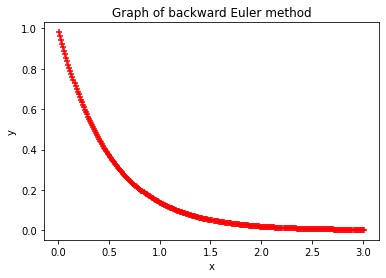

In [ ]:
# Code for backward euler method
# backward_euler() uses backward Euler to solve an ODE.

#import python library
#import numpy as np
import numpy as np

#import pandas as pd
import pandas as pd

# importing the required module
import matplotlib.pyplot as plt

#import seaborn as sns
import seaborn as sns

#declaring variables
X = 0     #inital value of x, recall y(0)=yo. therefore x(0)= 0
Y = 1     #inital value of y, recall y(0)=yo. therefore y(0)= yo and yo = 1 {initial value}
n = 3     #final time
h = 0.01  #h = step
LAMBDA = -2   #Lambda value of the equation, For positive step size h and λ < 0,
UX = 3


#calling our function f(x,y)
def f(X,Y):

#Using either while loop or for loop to express our alogrithm
  while (X<UX):
    Y = Y/(1 - ( h * LAMBDA ))
    X = X + h
    print (X,Y)     #Result of the computed x and y for the equation

#ploting the graph of Y againt X
    plt.scatter(X, Y, label= "stars", color= "red",
            marker= "+", s=30)
    plt.plot(X,Y)
    plt.title("Graph of backward Euler method")
    plt.xlabel("x")
    plt.ylabel("y")


f(X,Y)

0.01 	 0.9802
0.02 	 0.96079204
0.03 	 0.9417683576079999
0.04 	 0.9231213441273615
0.05 	 0.9048435415136397
0.060000000000000005 	 0.8869276393916695
0.07 	 0.8693664721317145
0.08 	 0.8521530159835065
0.09 	 0.835280386267033
0.09999999999999999 	 0.8187418346189458
0.10999999999999999 	 0.8025307462934906
0.11999999999999998 	 0.7866406375168795
0.12999999999999998 	 0.7710651528940453
0.13999999999999999 	 0.7557980628667432
0.15 	 0.7408332612219817
0.16 	 0.7261647626497864
0.17 	 0.7117867003493206
0.18000000000000002 	 0.697693323682404
0.19000000000000003 	 0.6838789958734923
0.20000000000000004 	 0.6703381917551972
0.21000000000000005 	 0.6570654955584442
0.22000000000000006 	 0.644055598746387
0.23000000000000007 	 0.6313032978912084
0.24000000000000007 	 0.6188034925929625
0.25000000000000006 	 0.6065511834396219
0.26000000000000006 	 0.5945414700075173
0.2700000000000001 	 0.5827695489013685
0.2800000000000001 	 0.5712307118331214
0.2900000000000001 	 0.5599203437388255
0

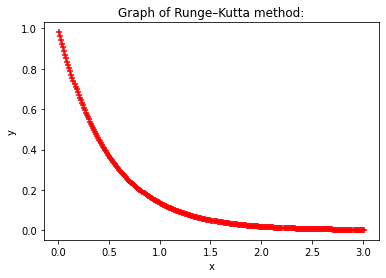

In [ ]:
# Code for backward euler method
# backward_euler() uses backward Euler to solve an ODE.

#import python library
#import numpy as np
import numpy as np

#import pandas as pd
import pandas as pd

# importing the required module
import matplotlib.pyplot as plt

#import seaborn as sns
import seaborn as sns

#declaring variables
X = 0     #inital value of x, recall y(0)=yo. therefore x(0)= 0
Y = 1     #inital value of y, recall y(0)=yo. therefore y(0)= yo and yo = 1 {initial value}
n = 3     #final time
h = 0.01  #h = step
LAMBDA = -2   #Lambda value of the equation, For positive step size h and λ < 0,
UX = 3


#calling our function f(x,y)
def f(X,Y):

#Using either while loop or for loop to express our alogrithm
  while (X<UX):
    Y = Y * (1 + (h * LAMBDA) + ((1/2) * (h**2) * (LAMBDA**2)))
    X = X + h
    print (X, "\t", Y)
    #print (X,Y)     #Result of the computed x and y for the equation

#ploting the graph of Y againt X
    plt.scatter(X, Y, label= "stars", color= "red",
            marker= "+", s=30)
    plt.plot(X,Y)
    plt.title("Graph of Runge–Kutta method:")
    plt.xlabel("x")
    plt.ylabel("y")


f(X,Y)

[2, 3, 4, 5] [1, 2, 3, 4]


Text(0, 0.5, 'y')

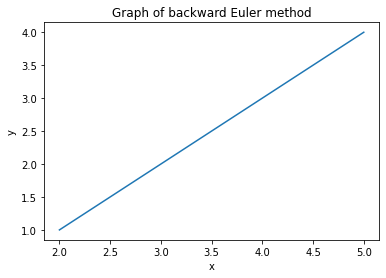

In [ ]:
Y = [1,2,3,4]
X = [2,3,4,5]
print (X,Y)

plt.plot(X,Y)
plt.title("Graph of backward Euler method")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = 0
Y = 1
n = 3
h = 0.01
LBD = -2
UX = 10

def f(X,Y):

  while (X<UX):
    Y = Y * (1 + (h * LBD) + ((1/2) * (h**2) * (LBD**2)))
    X = X + h
    print (X,Y)

    plt.plot(X,Y)

f(X,Y)

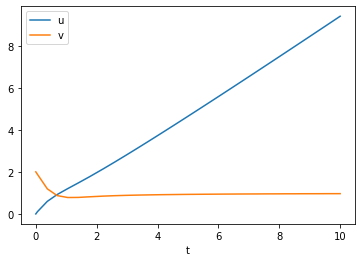

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

# Define the right-hand side of the differential equation
def f(t, x, mu):
    u, v = x
    return [v, mu*(1-v**2)*u - v]

# Set up the initial conditions
x0 = [0, 2]
tspan = [0, 10]
mu = 1.5

# Solve the system using solve_ivp
sol = solve_ivp(lambda t, x: f(t, x, mu), tspan, x0)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[0], label='u')
plt.plot(sol.t, sol.y[1], label='v')
plt.legend()
plt.xlabel('t')
plt.show()

This python cod is to generate the CGPA oof student using 5.0 scale

In [ ]:
# this code was done out of the need to calculate Benny GPA

TCU = int(input ("Enter the Total Credit Unit (TCU)= "))
print ("Your Total Credit Unit is ",TCU)

Course_Num = int ( input ("Enter the Total number of course=  "))
print ("Your Total Credit Unit is ",TCU)

# A = 5
# B = 4
# C = 3
# D = 2
# E = 1
# F = 0



Enter the Total Credit Unit (TCU)= 18
Your Total Credit Unit is  18


In [ ]:
# prompt: Can you generate code to calculate CGPA for a 5.0 scale

# Define the list of possible grades and their corresponding numerical values
grades = ['A', 'B', 'C', 'D', 'E', 'F']
grade_values = [5.0, 4.0, 3.0, 2.0, 1.0, 0.0]

# Initialize variables
total_credits = 0
quality_points = 0

# Loop through each course
Course_Num =  int ( input ("Enter the Total number of course=  "))
print ("Your Total coure is ",Course_Num)

for i in range(Course_Num):
    # Get the course name
    course_name = input("Enter the course name: ")

    # Get the grade for the course
    grade = input("Enter the grade for the course: ")

    # Convert the grade to uppercase
    grade = grade.upper()

    # Find the index of the grade in the list of possible grades
    grade_index = grades.index(grade)

    # Get the credit units for the course
    credits = int(input("Enter the credit units for the course: "))

    # Calculate the quality points for the course
    quality_points += grade_values[grade_index] * credits

    # Add the credits to the total credits
    total_credits += credits

# Calculate the CGPA
cgpa = quality_points / total_credits

# Print the CGPA
print("Your CGPA is", cgpa)


Enter the Total number of course=  8
Your Total coure is  8
Enter the course name: ARE 202
Enter the grade for the course: C
Enter the credit units for the course: 3
Enter the course name: CSC 102
Enter the grade for the course: B
Enter the credit units for the course: 3
Enter the course name: CSP 202
Enter the grade for the course: B
Enter the credit units for the course: 2
Enter the course name: CSP 204
Enter the grade for the course: C
Enter the credit units for the course: 2
Enter the course name: FWT 202
Enter the grade for the course: C
Enter the credit units for the course: 3
Enter the course name: CSP 210
Enter the grade for the course: A
Enter the credit units for the course: 2
Enter the course name: PMT 210
Enter the grade for the course: C
Enter the credit units for the course: 3
Enter the course name: APH 204
Enter the grade for the course: F
Enter the credit units for the course: 0
Your CGPA is 3.5


In [ ]:
# prompt: can you generate a code to calculate the CGPA of 4.0 scale

TCU = int(input ("Enter the Total Credit Unit (TCU)= "))
print ("Your Total Credit Unit is ",TCU)

Course_Num = int ( input ("Enter the Total number of course=  "))
print ("Your Total Credit Unit is ",TCU)

# Define the list of possible grades and their corresponding numerical values
grades = ['A', 'B', 'C', 'D', 'F']
grade_values = [4.0, 3.0, 2.0, 1.0, 0.0]

# Initialize variables
total_credits = 0
quality_points = 0

# Loop through each course
Course_Num =  int ( input ("Enter the Total number of course=  "))
print ("Your Total coure is ",Course_Num)

for i in range(Course_Num):
    # Get the course name
    course_name = input("Enter the course name: ")

    # Get the grade for the course
    grade = input("Enter the grade for the course: ")

    # Convert the grade to uppercase
    grade = grade.upper()

    # Find the index of the grade in the list of possible grades
    grade_index = grades.index(grade)

    # Get the credit units for the course
    credits = int(input("Enter the credit units for the course: "))

    # Calculate the quality points for the course
    quality_points += grade_values[grade_index] * credits

    # Add the credits to the total credits
    total_credits += credits

# Calculate the CGPA
cgpa = quality_points / total_credits

# Print the CGPA
print("Your CGPA is", cgpa)
